### Simple look at data

In [1]:
import pandas as pd

train = pd.read_csv('./data/titanic/train.csv')
test = pd.read_csv('./data/titanic/test.csv')

### Shape of dataset

In [2]:
print('train has {} rows and {} columns'.format(*train.shape))
print('test has {} rows and {} columns'.format(*test.shape))

train has 891 rows and 12 columns
test has 418 rows and 11 columns


### Structure of train dataset

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Structure of test dataset

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### Look at the data

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Preparation and Cleaning

### Deal with missing values

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Check if exists any missing values

In [8]:
na_check = train.isna().any()

# Display the result
print(na_check)

# Additionally, if you want to print out whether each column contains NA values
for column in train.columns:
    if na_check[column]:
        print(f"Column '{column}' contains NA values.")
    else:
        print(f"Column '{column}' does not contain NA values.")

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
Column 'PassengerId' does not contain NA values.
Column 'Survived' does not contain NA values.
Column 'Pclass' does not contain NA values.
Column 'Name' does not contain NA values.
Column 'Sex' does not contain NA values.
Column 'Age' contains NA values.
Column 'SibSp' does not contain NA values.
Column 'Parch' does not contain NA values.
Column 'Ticket' does not contain NA values.
Column 'Fare' does not contain NA values.
Column 'Cabin' contains NA values.
Column 'Embarked' contains NA values.


#### Count Missing values on each column

In [9]:
# Count the number of NA values in each column
na_count = train.isna().sum()

# Display the result
print(na_count)

# Additionally, if you want to print out the number of NA values in each column
for column in train.columns:
    print(f"Column '{column}' has {na_count[column]} NA values.")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Column 'PassengerId' has 0 NA values.
Column 'Survived' has 0 NA values.
Column 'Pclass' has 0 NA values.
Column 'Name' has 0 NA values.
Column 'Sex' has 0 NA values.
Column 'Age' has 177 NA values.
Column 'SibSp' has 0 NA values.
Column 'Parch' has 0 NA values.
Column 'Ticket' has 0 NA values.
Column 'Fare' has 0 NA values.
Column 'Cabin' has 687 NA values.
Column 'Embarked' has 2 NA values.


In [10]:
# option 1
# We only have two passengers without it. This is bearable
train = train.dropna(subset=["Embarked"])

# option 2
# We only have very few information about the cabin, let's drop it
train = train.drop("Cabin", axis=1)

# option 3
# The age misses quite a few times. But intuition
# says it might be important for someone's chance to survive.
mean = train["Age"].mean()
train["Age"] = train["Age"].fillna(mean)

train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### Identifiers

In [11]:
print('There are {} different (unique) PassengerIds in the data'.format(train["PassengerId"].nunique()))
print('There are {} different (unique) names in the data'.format(train["Name"].nunique()))
print('There are {} different (unique) ticket numbers in the data'.format(train["Ticket"].nunique()))

There are 889 different (unique) PassengerIds in the data
There are 889 different (unique) names in the data
There are 680 different (unique) ticket numbers in the data


#### Some observations
- PassengerIDS and Name are perfectly unique (perfect identifiers)
- PassengerIDS are consecutive number ==> No connection ==> Drop
- Name does not help ==> Drop
- Since Ticket is not perfectly unique ==> Drop

In [12]:
train = train.drop("PassengerId", axis=1)
train = train.drop("Name", axis=1)
train = train.drop("Ticket", axis=1)

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


### Text And Categorical Encoding

In [13]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.642093,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


#### Encoding column Sex and Embarked

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['Sex', 'Embarked']:
    le.fit(train[col])
    train[col] = le.transform(train[col])

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Feature Scaling

In [15]:
print('The maximum age is {}'.format(train["Age"].max()))
print('The maximum fare is {}'.format(train["Fare"].max()))

The maximum age is 80.0
The maximum fare is 512.3292


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

print('The minimum value is {} and the maximum value is {}'.format(train.min(), train.max()))

The minimum value is 0.0 and the maximum value is 1.0


### Spliting Training data to train set (80%) and test set (20%)

In [17]:
from sklearn.model_selection import train_test_split

input_data = train[:, 1:8]
labels = train[:, 0]

train_input, test_input, train_labels, test_labels = train_test_split(
input_data, labels, test_size = 0.2)

print('We have {} training and {} testing rows'.format(train_input.shape[0], test_input.shape[0]))
print('There are {} input columns'.format(train_input.shape[1]))

We have 711 training and 178 testing rows
There are 7 input columns


In [18]:
import numpy as np

with open('data/train.npy', 'wb') as f:
    np.save(f, train_input)
    np.save(f, train_labels)

with open('data/test.npy', 'wb') as f:
    np.save(f, test_input)
    np.save(f, test_labels)


## Baseline

### Build a simple guessing classifier

In [19]:
import random
random.seed(a=None, version=2)

def classify(passenger):
    return random.randint(0, 1)

def run(f_classify, x):
    return list(map(f_classify, x))

In [20]:
result = run(classify, train_input)
print(result)

[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 

### Evaluate the classifier

In [21]:
def evaluate(predictions, actual):
    correct = list(filter(
    lambda item: item[0] == item[1],
    list(zip(predictions,actual))
))
    return '{} correct predictions out of {}. Accuracy {:.0f} %'.format(len(correct), len(actual), 100*len(correct)/len(actual))

print(evaluate(run(classify, train_input), train_labels))

359 correct predictions out of 711. Accuracy 50 %


In [22]:
def predict_death(item):
    return 0

print(evaluate(run(predict_death, train_input), train_labels))


441 correct predictions out of 711. Accuracy 62 %


## Classfier Evaluation and Measures

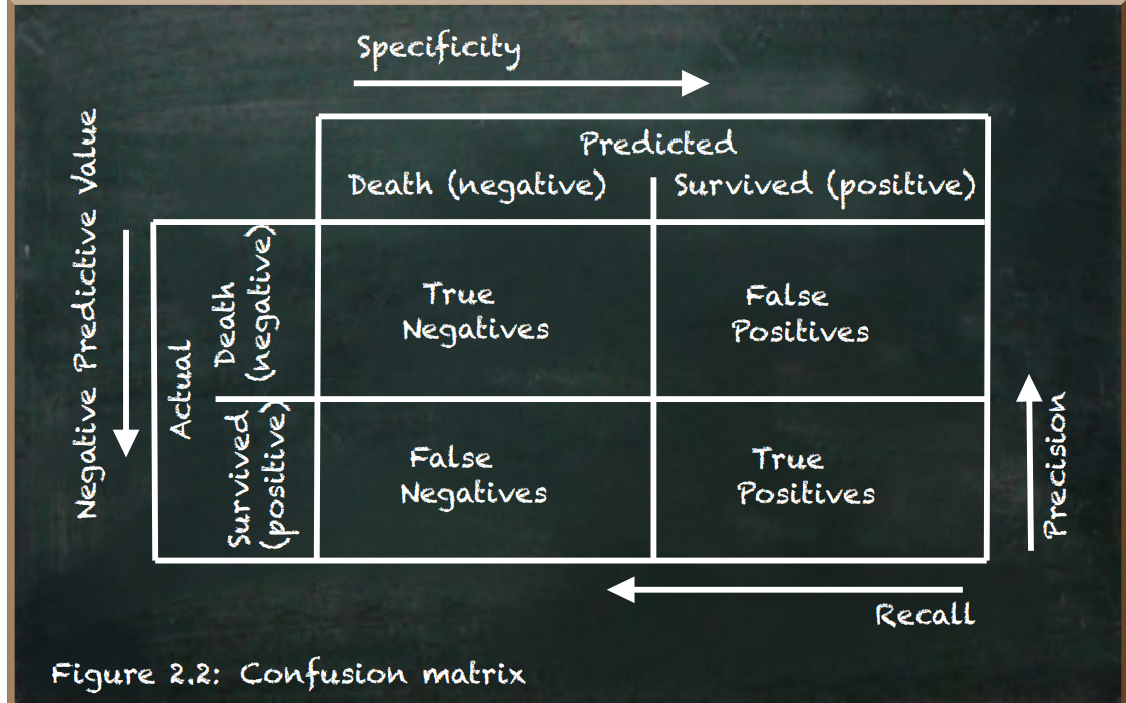 \
There are four possibilities:
- True Negatives (TN): a passenger who died was correctly predicted
- False Positives (FP):apassengerwhodiedwaswronglypredictedtosurvive
- False Negatives (FN): a passenger who survived was wrongly predicted
to die
- True Positive (TP): a passenger who survived was correctly predicted

In [23]:
from sklearn.metrics import confusion_matrix

predictions = run(predict_death, train_input)
confusion_matrix(train_labels, predictions)

array([[441,   0],
       [270,   0]])

#### Precision Formula

The formula for precision is given by:

$$ \text{Precision} = \frac{\sum \text{True Positives}}{\sum \text{All Predicted Positives}} $$

Where:
- $ \sum \text{True Positives}$ is the sum of all correctly predicted positive instances.
- $ \sum \text{All Predicted Positives} $ is the sum of all instances predicted as positive.

In [24]:
from sklearn.metrics import precision_score
print('The precision score of the predict_death classifier is {}'.format(precision_score(train_labels, predictions)))


The precision score of the predict_death classifier is 0.0


c:\Users\HOANG ANH\Documents\Quantum Computing\Implementations_or_Programs\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Recall
The formula for recall is given by:

$$ \text{Recall} = \frac{\sum \text{True Positives}}{\sum \text{All Actual Positives}} $$

Where:
- $\sum \text{True Positives}$ is the sum of all correctly predicted positive instances.
- $\sum \text{All Actual Positives}$ is the sum of all instances that are actually positive.

In [25]:
from sklearn.metrics import recall_score
print('The recall score of the predict_death classifier is {}'.format(recall_score(train_labels, predictions)))


The recall score of the predict_death classifier is 0.0


#### Specificity
The formula for specificity is given by:

$$ \text{Specificity} = \frac{\sum \text{True Negatives}}{\sum \text{All Actual Negatives}} $$

Where:
- $\sum \text{True Negatives}$ is the sum of all correctly predicted negative instances.
- $\sum \text{All Actual Negatives}$ is the sum of all instances that are actually negative.

Specificity is the "accuracy of the actual negatives." It only looks at actual negatives (deaths).

#### Negative Predictive Value (NPV)
The formula for negative predictive value is given by:

$$ \text{Negative Predictive Value (NPV)} = \frac{\sum \text{True Negatives}}{\sum \text{All Predicted Negatives}} $$

Where:
- $\sum \text{True Negatives}$ is the sum of all correctly predicted negative instances.
- $\sum \text{All Predicted Negatives}$ is the sum of all instances predicted as negative.

The negative predictive value (NPV) is the "accuracy of the negative predictions."

In [26]:
def specificity(matrix):
     return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

cm = confusion_matrix(train_labels, predictions)

print('The specificity score of the predict_death classifier is {:.2f}'.format(specificity(cm))) 
print('The npv score of the predict_death classifier is {:.2f}'.format(npv(cm)))


The specificity score of the predict_death classifier is 1.00
The npv score of the predict_death classifier is 0.62


### Score of random classifier

In [27]:
random_predictions = run(classify, train_input)
random_cm = confusion_matrix(train_labels, random_predictions)

print('The precision score of the random classifier is {:.2f}'
    .format(precision_score(train_labels, random_predictions)))
print('The recall score of the random classifier is {:.2f}'
    .format(recall_score(train_labels, random_predictions)))
print('The specificity score of the random classifier is {:.2f}'
    .format(specificity(random_cm)))
print('The npv score of the random classifier is {:.2f}'
    .format(npv(random_cm)))


The precision score of the random classifier is 0.37
The recall score of the random classifier is 0.47
The specificity score of the random classifier is 0.51
The npv score of the random classifier is 0.62


### Hypocrite Classifier

In [28]:
def hypocrite(passenger, weight):
    return round(min(1,max(0,weight*0.5+random.uniform(0, 1))))

In [29]:
w_predictions = run(lambda passenger: hypocrite(passenger, -0.5), train_input)
w_cm = confusion_matrix(train_labels, w_predictions)

print('The precision score of the hypocrite classifier is {:.2f}'.format(precision_score(train_labels, w_predictions)))
print('The recall score of the hypocrite classifier is {:.2f}'.format(recall_score(train_labels, w_predictions)))
print('The specificity score of the hypocrite classifier is {:.2f}'.format(specificity(w_cm)))
print('The npv score of the hypocrite classifier is {:.2f}'.format(npv(w_cm)))

The precision score of the hypocrite classifier is 0.41
The recall score of the hypocrite classifier is 0.28
The specificity score of the hypocrite classifier is 0.75
The npv score of the hypocrite classifier is 0.63


In [30]:
import numpy as np

# number of steps to consider between −1 and 1
cnt_steps = 40

# a list of the step numbers [0, 1, ..., 38, 39]
steps = np.arange(0, cnt_steps, 1).tolist()

# list of the weights at every step [−1, −0.95, ... 0.9, 0.95, 1.0]
weights = list(map(lambda weight: round(weight, 2), np.arange(-1, 1+2/(cnt_steps-1), 2/(cnt_steps-1)).tolist()))

# list of predictions at every step
l_predictions = list(map(
    lambda step: run(
        lambda passenger: hypocrite(passenger, weights[step]),
        train_input
    ),
    steps
))

# list of confusion matrices at every step
l_cm = list(map(
    lambda step: confusion_matrix(train_labels, l_predictions[step]),
    steps
))


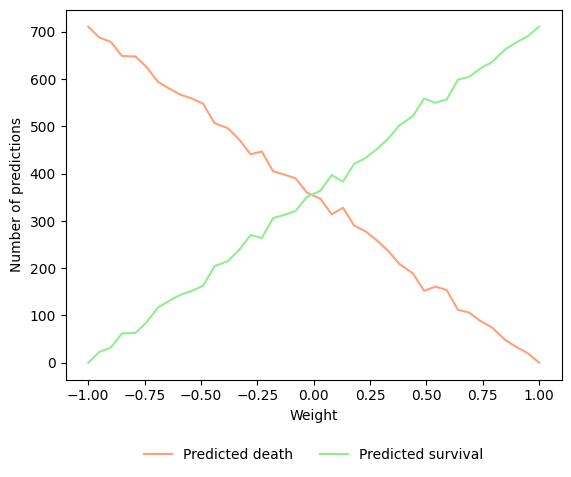

In [31]:
import matplotlib.pyplot as plt
import matplotlib

# create a graph for the number of predicted deaths
deaths, = plt.plot(
    weights, # point at x-axis
    list(map(lambda cur: l_cm[cur][0][0]+l_cm[cur][1][0], steps)),
    'lightsalmon', # color of the graph
    label='Predicted death'
)

# create a graph for the number of predicted survivals
survivals, = plt.plot(
    weights, # point at x-axis
    list(map(lambda cur: l_cm[cur][0][1]+l_cm[cur][1][1], steps)),
    'lightgreen', # color of the graph
    label='Predicted survival'
)

plt.legend(handles=[deaths, survivals], loc='upper center',
           bbox_to_anchor=(0.5, -0.15), framealpha=0.0, ncol=2)
plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()


In [32]:
l_precision = list(map(lambda step: precision_score(train_labels, l_predictions[step]), steps))
l_recall = list(map(lambda step: recall_score(train_labels, l_predictions[step]), steps))
l_specificity = list(map(lambda step: specificity(l_cm[step]), steps))
l_npv = list(map(lambda step: npv(l_cm[step]), steps))

c:\Users\HOANG ANH\Documents\Quantum Computing\Implementations_or_Programs\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


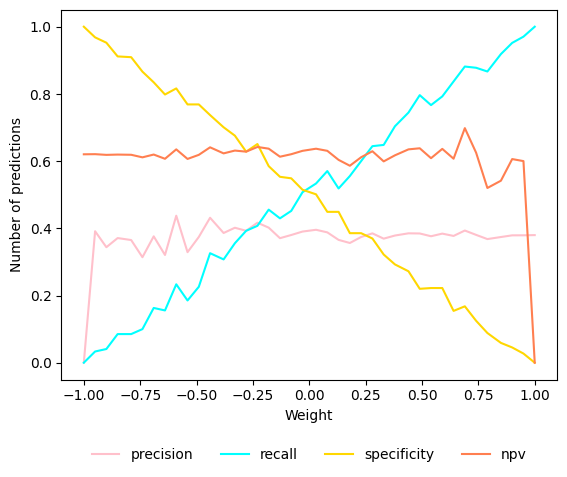

In [33]:
m_precision, = plt.plot(weights, l_precision, 'pink', label="precision")
m_recall, = plt.plot(weights, l_recall, 'cyan', label="recall")
m_specificity, = plt.plot(weights, l_specificity, 'gold', label="specificity")
m_npv, = plt.plot(weights, l_npv, 'coral', label="npv")

plt.legend(
    handles=[m_precision, m_recall, m_specificity, m_npv],
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    framealpha=0.0,
    ncol=4
)

plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()


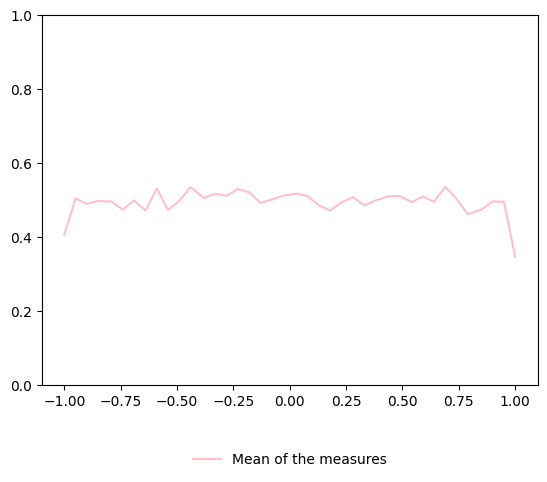

In [34]:
l_mean = list(map(lambda step: sum(step)*0.25, zip(l_precision, l_recall,
l_specificity, l_npv)))
m_mean, = plt.plot(weights, l_mean, 'pink', label="Mean of the measures")

plt.legend(handles=[m_mean],loc='upper center',
bbox_to_anchor=(0.5, -0.15),framealpha=0.0)
plt.ylim(0, 1)
plt.show()

In [35]:
def classifier_report(name, run, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)
    
    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25 * (cr_precision + cr_recall + cr_specificity + cr_npv)
    
    print('The precision score of the {} classifier is {:.2f}'
        .format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'
        .format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'
        .format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'
        .format(name, cr_npv))
    print('The information level is: {:.2f}'
        .format(cr_level))


In [36]:
classifier_report(
"Random PQC",
run,
classify,
train_input,
train_labels)


The precision score of the Random PQC classifier is 0.37
The recall score of the Random PQC classifier is 0.51
The specificity score of the Random PQC classifier is 0.48
The npv score of the Random PQC classifier is 0.61
The information level is: 0.49


## Quantum Classification

### Import Essentail libraries

In [37]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit import transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer

### Simple demo

#### Initializing state

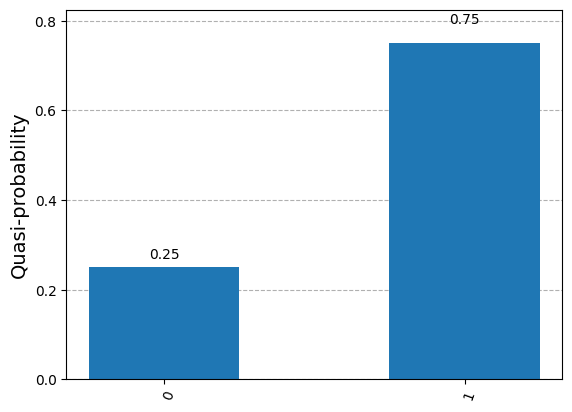

In [38]:
import math
qc = QuantumCircuit(1)
initial_state = [1/2, math.sqrt(3)/2]  # Here, we insert the state

qc.initialize(initial_state, 0)

backend = Aer.get_backend('statevector_simulator')
transpiled_qc = transpile(qc, backend)

result = backend.run(transpiled_qc, shots=15000).result()
counts = result.get_counts()

plot_histogram(counts)

#### Iniitializing state

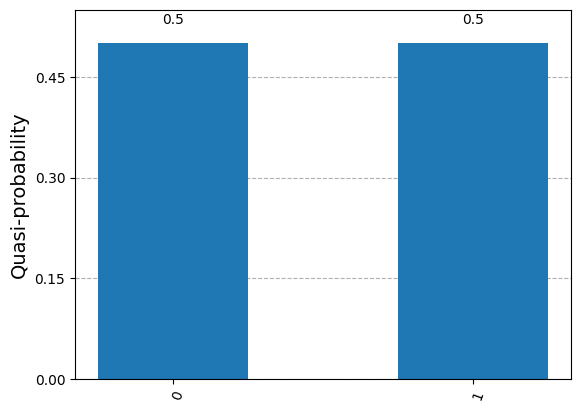

In [39]:
import math
qc = QuantumCircuit(1)
initial_state = [1/math.sqrt(2), 1/math.sqrt(2)]  # Here, we insert the state

qc.initialize(initial_state, 0)

backend = Aer.get_backend('statevector_simulator')
transpiled_qc = transpile(qc, backend)

result = backend.run(transpiled_qc, shots=15000).result()
counts = result.get_counts()

plot_histogram(counts)

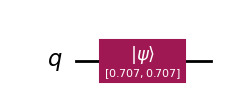

In [40]:
qc.draw(output="mpl")

In [ ]:
l